<a href="https://colab.research.google.com/github/zainali60/CNN-MNIST/blob/main/cat_%26_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
import os
from os.path import join
import cv2
import pandas as pd
import pathlib
from pathlib import Path

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
directory = Path("/content/drive/MyDrive/cats_and_dogs_small")

In [4]:
train_dir = Path("/content/drive/MyDrive/cats_and_dogs_small/train")
test_dir = Path("/content/drive/MyDrive/cats_and_dogs_small/test")
validation_dir = Path("/content/drive/MyDrive/cats_and_dogs_small/validation")

In [5]:
print('total training cat images:', len(os.listdir(train_dir)))

total training cat images: 2


In [6]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [11]:
history = model.fit(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 451s 4s/step - loss: 0.7022 - acc: 0.5286 - val_loss: 0.6777 - val_acc: 0.5230
Epoch 2/30
100/100 [==============================] - 105s 1s/step - loss: 0.6652 - acc: 0.5914 - val_loss: 0.6489 - val_acc: 0.6060
Epoch 3/30
100/100 [==============================] - 109s 1s/step - loss: 0.6397 - acc: 0.6251 - val_loss: 0.6355 - val_acc: 0.6250
Epoch 4/30
100/100 [==============================] - 109s 1s/step - loss: 0.5910 - acc: 0.6884 - val_loss: 0.5980 - val_acc: 0.6670
Epoch 5/30
100/100 [==============================] - 109s 1s/step - loss: 0.5476 - acc: 0.7281 - val_loss: 0.6178 - val_acc: 0.6590
Epoch 6/30
100/100 [==============================] - 109s 1s/step - loss: 0.5256 - acc: 0.7286 - val_loss: 0.5607 - val_acc: 0.7010
Epoch 7/30
100/100 [==============================] - 109s 1s/step - loss: 0.4703 - acc: 0.7842 - val_loss: 0.5730 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 108s 1s/step - 

In [12]:
model.save('cats_and_dogs_small_1.h5')


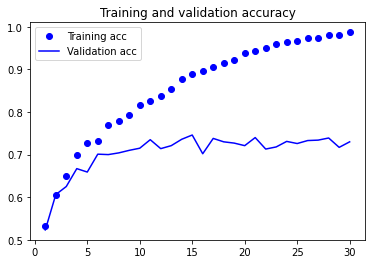

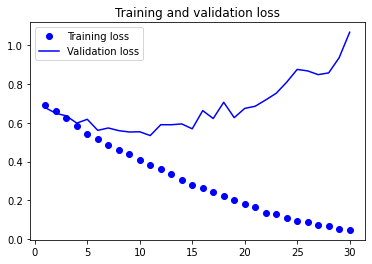

In [13]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [18]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [19]:
model = load_model('cats_and_dogs_small_1.h5')


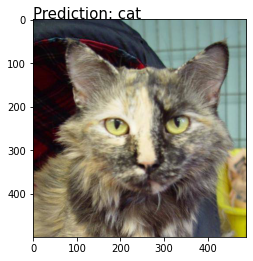

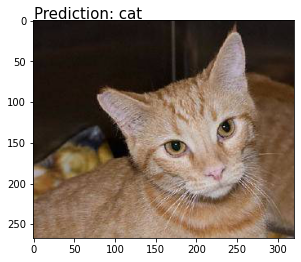

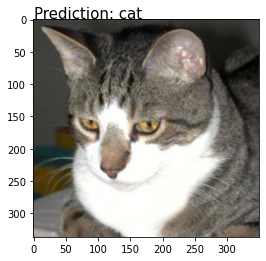

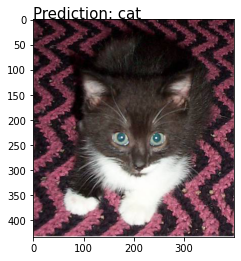

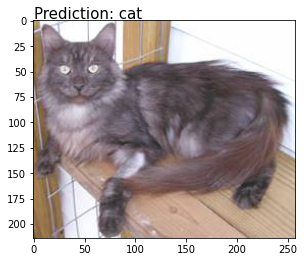

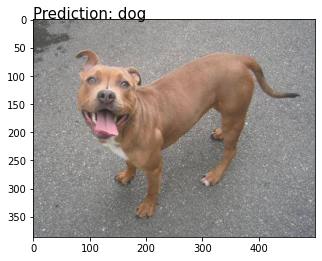

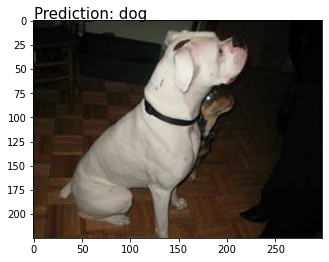

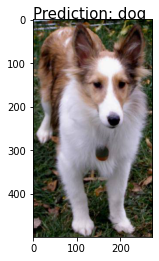

In [25]:
for i in range(1, 9):
    test_image = image.load_img(str(i) + '.jpg', target_size=(150, 150))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image)
    
    if result[0][0] >= 0.5:
        prediction = 'dog'
    else:
        prediction = 'cat'
    
    img = mpimg.imread(str(i) +'.jpg')
    imgplot = plt.imshow(img)
    plt.text(x=0, y=-2, s='Prediction: ' + prediction, fontsize=15)
    plt.show()